# Imports

In [1]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import nn
import numpy as np
from functools import partial
import matplotlib.pyplot as plt 
import time
from IPython.display import Image

In [2]:
from api.gaussian_functions import (gaussian_data_sampling_mu, 
                                 gaussian_data_sampling_nu,
                                 nu_sampler_from_discrete_distr)

from api.constants import (f_net_default, u_net_default, v_vec_default,
                           centers_nu_default, cov_matrix_default,
                           c_cost_type_default, d_cost_type_default,
                           reg_modes_arr, batch_size_val_default,
                           reg_mode_default, eps_default,
                           epochs_default, batch_size_default, 
                           dtype_default, device_default,
                           random_state_default, random_states_train_default,
                           mu_sampler_default, nu_data_val_default, 
                           optimizer_mode_default, lr_default, 
                           centers_nu_default,
                           dir_to_save_default)

from api.gaussian_functions import index_sampler

from api.neural_ot import Neural_OT
from api.neural_ot_continious_to_discrete import Neural_OT_continious_to_discrete

# Parameters

In [3]:
torch.manual_seed(42)

my_u_net = nn.Sequential(nn.Linear(2, 200),
                  nn.BatchNorm1d(200),
                  nn.SELU(),
                  nn.Linear(200, 500),
                  nn.BatchNorm1d(500),
                  nn.SELU(),
                  nn.Linear(500, 500),
                  nn.BatchNorm1d(500),
                  nn.SELU(),
                  nn.Linear(500, 1)
                 )

my_f_net = nn.Sequential(nn.Linear(2, 200),
#                  nn.BatchNorm1d(200),
                  nn.SELU(),
                  nn.Linear(200, 500),
#                  nn.BatchNorm1d(500),
                  nn.SELU(),
                  nn.Linear(500, 500),
#                  nn.BatchNorm1d(500),
                  nn.SELU(),
                  nn.Linear(500, 2)
                 )

batch_size_val = 1000
nu_data = gaussian_data_sampling_nu(centers_nu_default, 
                                                     cov_matrix_default, 
                                                     batch_size_val, 
                                                     random_state_default, 
                                                     device = device_default)

my_v_vec = torch.zeros(batch_size_val, 
                                   dtype = dtype_default)

my_eps = 1e-2
my_reg_mode = 'l2'

# Testing

In [4]:
default_experiment = Neural_OT_continious_to_discrete(eps = my_eps, reg_mode = my_reg_mode)

In [5]:
default_experiment.replace_u(my_u_net)
default_experiment.replace_v(my_v_vec)

dual_loss_arr_batch = []
dual_loss_arr_val = []

lr = 1e-3
optimizer_mode = 'Adam'

epochs = 200
epoch_step_to_print = 20

random_states_train = range(epochs)

batch_size = 1000

default_experiment.stochastic_OT_computation(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             optimizer_mode = optimizer_mode,
                                             random_states_train = random_states_train,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = nu_data,
                                             loss_arr_batch = dual_loss_arr_batch,
                                             loss_arr_val = dual_loss_arr_val, 
                                             epoch_step_to_print = epoch_step_to_print)

------------------------------
Epoch_num = 1
Consumed time = 11.719152688980103 seconds
Loss estimation on sampled data = 0.015199621158460878
Loss estimation on validation data = 0.16424611103044734
------------------------------
Epoch_num = 21
Consumed time = 0.0027878284454345703 seconds
Loss estimation on sampled data = 2.6114400774883166
Loss estimation on validation data = 2.4037920955658536
------------------------------
Epoch_num = 41
Consumed time = 0.0027892589569091797 seconds
Loss estimation on sampled data = 2.760074090397519
Loss estimation on validation data = 2.756710382606085
------------------------------
Epoch_num = 61
Consumed time = 0.0027420520782470703 seconds
Loss estimation on sampled data = 2.720840324803697
Loss estimation on validation data = 2.7774705795040715
------------------------------
Epoch_num = 81
Consumed time = 0.0026144981384277344 seconds
Loss estimation on sampled data = 2.707163862610932
Loss estimation on validation data = 2.7922966968064866


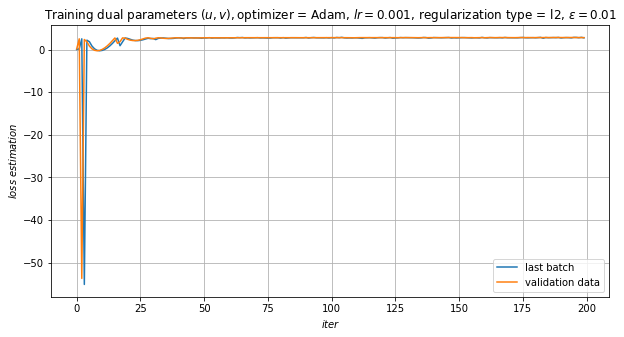

In [6]:
plot_mode = 'dual'

default_experiment.plot_loss_graphs(loss_arr_batch = dual_loss_arr_batch, 
                                    loss_arr_val = dual_loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

In [7]:
default_experiment.replace_f(my_f_net)

loss_arr_batch = []
loss_arr_val = []

lr = 1e-3
optimizer_mode = 'Adam'

epochs = 101
epoch_step_to_print = 10
random_states_train = range(epochs)
random_state_val = random_state_default

batch_size = 1000

default_experiment.optimal_map_learning(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             optimizer_mode = optimizer_mode,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = nu_data,
                                             random_states_train = random_states_train,
                                             random_state_val = random_state_val,
                                             loss_arr_batch = loss_arr_batch,
                                             loss_arr_val = loss_arr_val,
                                             epoch_step_to_print = epoch_step_to_print,
                                             make_gif = True)

------------------------------
Epoch_num = 1
Consumed time = 1.1380720138549805 seconds
Loss estimation on sampled data = 2.045451323519986
Loss estimation on validation data = 3.9855609603695203
------------------------------
Epoch_num = 11
Consumed time = 0.0024352073669433594 seconds
Loss estimation on sampled data = 0.8979646317874537
Loss estimation on validation data = 0.9012281251220688
------------------------------
Epoch_num = 21
Consumed time = 0.0037195682525634766 seconds
Loss estimation on sampled data = 0.9321175793176305
Loss estimation on validation data = 0.8803130515196693
------------------------------
Epoch_num = 31
Consumed time = 0.0025718212127685547 seconds
Loss estimation on sampled data = 0.640316185725736
Loss estimation on validation data = 0.6459327310266292
------------------------------
Epoch_num = 41
Consumed time = 0.003049135208129883 seconds
Loss estimation on sampled data = 0.5345630893835357
Loss estimation on validation data = 0.5362878756675371
--

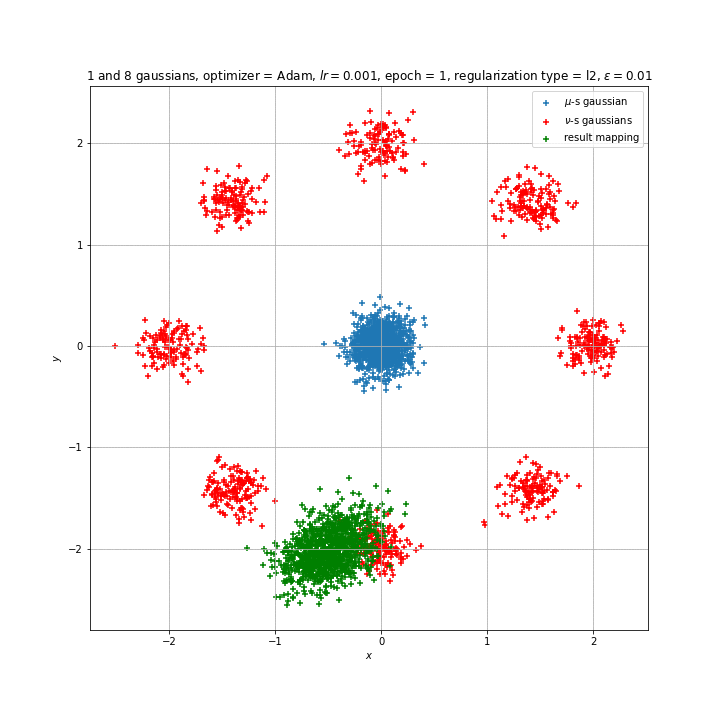

In [8]:
gif = default_experiment.create_path_to_gif(optimizer_mode, lr)
Image(gif)

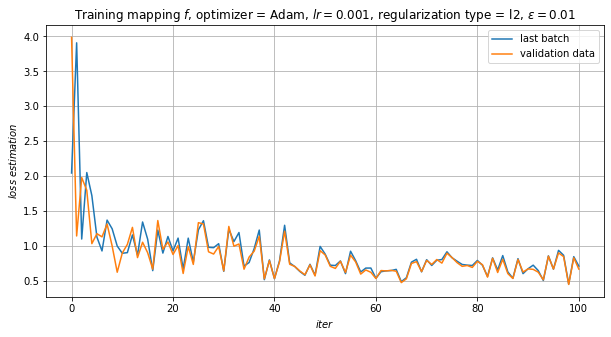

In [9]:
plot_mode = 'mapping training'

default_experiment.plot_loss_graphs(loss_arr_batch = loss_arr_batch, 
                                    loss_arr_val = loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

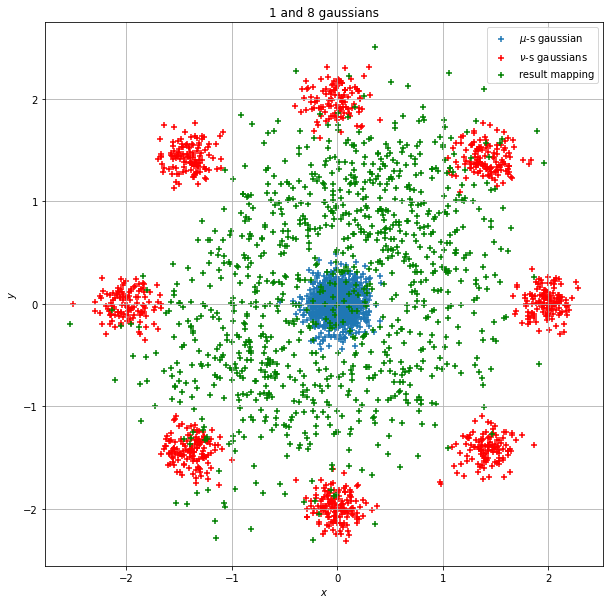

In [10]:
random_state = random_state_default

default_experiment.plot_2d_mapping_discrete_nu(mu_sampler = mu_sampler_default, 
                                               nu_data_val = nu_data,
                                               random_state = random_state,
                                               show_plot = True)

In [17]:
default_experiment.replace_f(my_f_net)

algo_2_loss_arr_batch = []
algo_2_loss_arr_val = []

lr = 1e-2
optimizer_mode = 'Algo 2'

epochs = 300
epoch_step_to_print = 20

shift = 1000
random_states_train = range(shift, shift + epochs)
random_state_val = random_state_default

batch_size = 1000

default_experiment.optimal_map_learning_algo_2(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = nu_data,
                                             random_states_train = random_states_train,
                                             random_state_val = random_state_val,
                                             loss_arr_batch = algo_2_loss_arr_batch,
                                             loss_arr_val = algo_2_loss_arr_val,
                                             epoch_step_to_print = epoch_step_to_print)

------------------------------
Epoch_num = 1
Consumed time = 0.002774953842163086 seconds
Loss estimation on sampled data = 1.922145669140956
Loss estimation on validation data = 1.7655290609221714
------------------------------
Epoch_num = 21
Consumed time = 0.002142190933227539 seconds
Loss estimation on sampled data = 1.0986908883538988
Loss estimation on validation data = 1.276055554316661
------------------------------
Epoch_num = 41
Consumed time = 0.002130746841430664 seconds
Loss estimation on sampled data = 0.8328788590299012
Loss estimation on validation data = 0.6646186845162951
------------------------------
Epoch_num = 61
Consumed time = 0.002034425735473633 seconds
Loss estimation on sampled data = 1.2077419625283015
Loss estimation on validation data = 1.2169687038436776
------------------------------
Epoch_num = 81
Consumed time = 0.0021381378173828125 seconds
Loss estimation on sampled data = 0.5483640959087768
Loss estimation on validation data = 0.6114356335934349
--

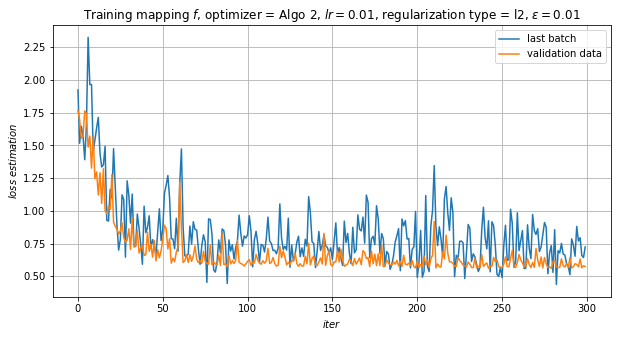

In [18]:
plot_mode = 'mapping training'

default_experiment.plot_loss_graphs(loss_arr_batch = algo_2_loss_arr_batch, 
                                    loss_arr_val = algo_2_loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

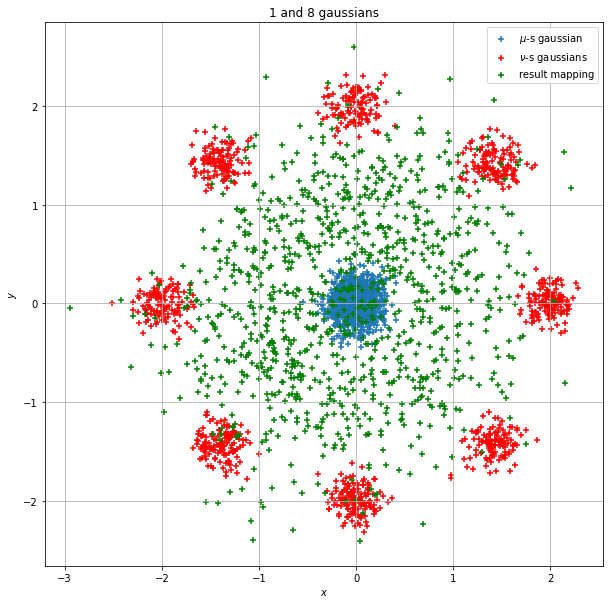

In [19]:
default_experiment.plot_2d_mapping_discrete_nu(mu_sampler = mu_sampler_default, 
                                               nu_data_val = nu_data,
                                               random_state = random_state,
                                               show_plot = True)